# Python Homework 1

<b> Instructions:</b> This Python Homework is due on <b> Sunday, October 9th, at 11:59 p.m.</b> You have to submit your version of this Jupyter Notebook via Gradescope!

In this homework you are supposed to use the random number generater random.random_sample from the numpy package to generate random numbers with three different distributions. 

Recall from the lecture that if $F:\mathbb{R}\rightarrow [0,1]$ is a distribution function with generalized inverse $F^{-1}:[0,1]\rightarrow \mathbb{R}$ and $U$ is a uniform random variable, then $F^{-1}(U)$ is a random variable with distribution function $F$.

Using the function random.random_sample from numpy package write three functions: 
* exponentialRV(seed, mean,n) that returns for given seed a bunch of n random variables from an exponential distribution with the provided mean. Derive the generalized inverse distribution function analytically for your simulation.
* binomial(seed, p,m,n) that returns for given seed a bunch of n Binomial distributed random numbers with the provided success probability p and the number of trial equal to m. You have to numerically calculate the inverse distribution function.
* funnyDiceRV(seed,n) that returns for given seed a bunch of n random number which describe a biased die with distribution $\mathbb{P}(\{1\})=\mathbb{P}(\{2\})=1/6$,$\mathbb{P}(\{3\})=\mathbb{P}(\{4\})=1/4$ and $\mathbb{P}(\{5\})=\mathbb{P}(\{6\})=1/12$.

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt

Here should come your code for the three functions:

In [10]:
def exponentialRV(seed, mean, n):
    np.random.seed(seed)
    U = np.random.random_sample(n)
    exponentialSample = (-mean) * np.log(1 - U)
    return exponentialSample

In [24]:
def binomial(seed, p, m, n):
    np.random.seed(seed)
    binomialSample = []
    for i in range(n):
      U = np.random.random_sample()
      k = 0
      cdf = 0
      while cdf <= U:
        cdf += (math.factorial(m) // math.factorial(k) // math.factorial(m - k)) * (p ** k) * ((1 - p) ** (m - k))
        k += 1
      binomialSample.append(k - 1)
    return binomialSample

In [25]:
def funnyDiceRV(seed, n):
    np.random.seed(seed)
    U = np.random.random_sample(n)
    funnyDiceSample = []
    for i in range(n):
      p = np.random.random_sample(1)
      if p > 0 and p <= 2/12:
        funnyDiceSample.append(1)
      elif p > 2/12 and p <= 4/12:
        funnyDiceSample.append(2)
      elif p > 4/12 and p <= 7/12:
        funnyDiceSample.append(3)
      elif p > 7/12 and p <= 10/12:
        funnyDiceSample.append(4)
      elif p > 10/12 and p <= 11/12:
        funnyDiceSample.append(5)
      elif p > 11/12:
        funnyDiceSample.append(6)
    return funnyDiceSample

In [27]:
print(exponentialRV(105, 3, 5))# You should test all three functions 
print(binomial(105, 0.7, 20, 5))
print(funnyDiceRV(105, 5))

[0.26236509 1.21717374 5.88456477 0.33509781 2.30128578]
[11, 13, 16, 11, 14]
[1, 2, 1, 3, 5]


You should use the following routine to plot a histogram of the distribution of all three simulated random variables

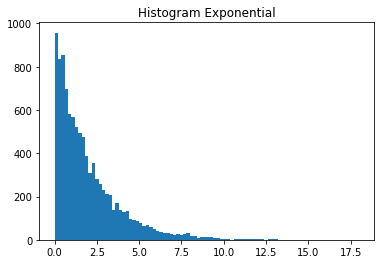

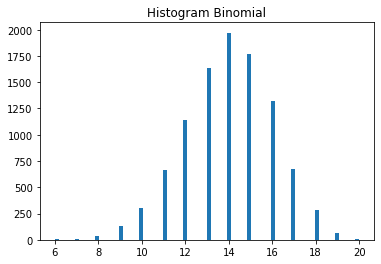

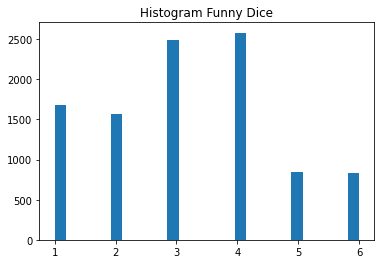

In [28]:
numberSimulations=10000
exponentialSamples=exponentialRV(1, 2, numberSimulations)
binomialSamples=binomial(1, 0.7,20,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)

np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()
plt.hist(binomialSamples, bins='auto')
plt.title("Histogram Binomial")
plt.show()
plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

For the exponential random variable, you should then test the empirical expectation and variance of the random variables you generated. Assume you have generated random variables $X_1,X_2,X_3,\dots,X_n$ calculate the empirical mean 
\begin{equation}
\hat{\text{ }\mu} =\frac{\sum^n_{i=1} X_i}{n}
\end{equation}
and the empirical variance 
\begin{equation}
\hat{\text{ }\sigma} = \frac{\sum^n_{i=1}(X_i - \hat{\mu})^2}{n}
\end{equation}
Use 10000 simulations. Is the result of your calculation in line with what you expect? Why?

In [32]:
empSamp = exponentialRV(5, 15, 10000)
empMean = sum(empSamp) / 10000
varSumList = [((i - empMean) ** 2) for i in empSamp]
empVar = sum(varSumList) / 10000
print("Empirical Mean: ", empMean)
print("Empirical Variance: ", empVar)

Empirical Mean:  15.048520083811198
Empirical Variance:  219.76799627174287


Explanation: Yes, I am satisfied with the mean calculation. Since I entered the mean as $15$, I would expect the empirical mean to be close to that. The empirical mean is only off by $0.04852$, which is acceptable.

Since the variance is calculated by averaging the squared deviations from the mean, and the deviation is very small, I would expect it to be close to $225$, which is $15^2$. $219.768$ is fairly close to $225$, so the variance calculation is also satisfactory.